### Import the Libraries
---

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    MinMaxScaler,
    PowerTransformer,
    FunctionTransformer,
    StandardScaler
)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from feature_engine.encoding import RareLabelEncoder, MeanEncoder, CountFrequencyEncoder
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.outliers import Winsorizer
import warnings
from sklearn.base import BaseEstimator, TransformerMixin

### Display settings
---

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sklearn.set_config(transform_output = 'pandas')

In [4]:
warnings.filterwarnings('ignore')

### Read the Data
---

In [5]:
path = r'C:\Users\Dell\Desktop\Machine Learning\FLight Price Predictions (AWS Sagemaker)\Data\train.csv'

train = pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,03-03-2019,Delhi,Cochin,02:15:00,04:25:00,1570,1,No Info,17024
1,Vistara,24-03-2019,Kolkata,Banglore,07:10:00,18:45:00,695,1,No Info,16932
2,Spicejet,09-04-2019,Banglore,Delhi,09:30:00,12:20:00,170,0,No Info,4423
3,Indigo,27-04-2019,Banglore,Delhi,21:15:00,00:15:00,180,0,No Info,3943
4,Air India,12-06-2019,Delhi,Cochin,09:45:00,09:25:00,1420,1,No Info,7480
...,...,...,...,...,...,...,...,...,...,...
6830,Indigo,03-06-2019,Banglore,Delhi,04:00:00,06:50:00,170,0,No Info,3943
6831,Indigo,24-06-2019,Delhi,Cochin,05:05:00,16:10:00,665,1,No Info,6442
6832,Air India,09-05-2019,Banglore,Delhi,10:00:00,12:45:00,165,0,No Info,5228
6833,Jet Airways,27-05-2019,Delhi,Cochin,07:05:00,12:35:00,330,1,In-flight meal not included,12898


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6835 entries, 0 to 6834
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          6835 non-null   object
 1   date_of_journey  6835 non-null   object
 2   source           6835 non-null   object
 3   destination      6835 non-null   object
 4   dep_time         6835 non-null   object
 5   arrival_time     6835 non-null   object
 6   duration         6835 non-null   int64 
 7   total_stops      6835 non-null   int64 
 8   additional_info  6835 non-null   object
 9   price            6835 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 534.1+ KB


In [7]:
X_train = train.drop(columns = 'price')
y_train = train.price.copy()

In [8]:
X_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,03-03-2019,Delhi,Cochin,02:15:00,04:25:00,1570,1,No Info
1,Vistara,24-03-2019,Kolkata,Banglore,07:10:00,18:45:00,695,1,No Info
2,Spicejet,09-04-2019,Banglore,Delhi,09:30:00,12:20:00,170,0,No Info
3,Indigo,27-04-2019,Banglore,Delhi,21:15:00,00:15:00,180,0,No Info
4,Air India,12-06-2019,Delhi,Cochin,09:45:00,09:25:00,1420,1,No Info
...,...,...,...,...,...,...,...,...,...
6830,Indigo,03-06-2019,Banglore,Delhi,04:00:00,06:50:00,170,0,No Info
6831,Indigo,24-06-2019,Delhi,Cochin,05:05:00,16:10:00,665,1,No Info
6832,Air India,09-05-2019,Banglore,Delhi,10:00:00,12:45:00,165,0,No Info
6833,Jet Airways,27-05-2019,Delhi,Cochin,07:05:00,12:35:00,330,1,In-flight meal not included


In [9]:
y_train

0       17024
1       16932
2        4423
3        3943
4        7480
        ...  
6830     3943
6831     6442
6832     5228
6833    12898
6834    22794
Name: price, Length: 6835, dtype: int64

### Transformation Operations
---

****1. Airline****
---

In [10]:
X_train.airline.unique()

array(['Jet Airways', 'Vistara', 'Spicejet', 'Indigo', 'Air India',
       'Multiple Carriers', 'Air Asia', 'Goair', 'Trujet'], dtype=object)

In [16]:
air_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('grouper', RareLabelEncoder(tol = 0.1, replace_with = 'Other', n_categories = 2)),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

air_transformer.fit_transform(X_train.loc[:, ['airline']])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6830,0.0,1.0,0.0,0.0,0.0
6831,0.0,1.0,0.0,0.0,0.0
6832,1.0,0.0,0.0,0.0,0.0
6833,0.0,0.0,1.0,0.0,0.0


****2. Date of Journey****
---

In [29]:
X_train.date_of_journey.unique()

array(['03-03-2019', '24-03-2019', '09-04-2019', '27-04-2019',
       '12-06-2019', '21-06-2019', '21-03-2019', '27-05-2019',
       '09-05-2019', '27-03-2019', '01-04-2019', '06-03-2019',
       '01-05-2019', '18-05-2019', '15-03-2019', '24-05-2019',
       '03-06-2019', '27-06-2019', '18-03-2019', '09-06-2019',
       '15-04-2019', '06-05-2019', '12-05-2019', '03-05-2019',
       '21-05-2019', '01-06-2019', '15-06-2019', '12-03-2019',
       '01-03-2019', '24-06-2019', '09-03-2019', '03-04-2019',
       '15-05-2019', '06-06-2019', '24-04-2019', '18-06-2019',
       '12-04-2019', '21-04-2019', '18-04-2019', '06-04-2019'],
      dtype=object)

In [30]:
X_train['date_of_journey'] = pd.to_datetime(X_train['date_of_journey'], dayfirst=True, errors='coerce')

In [34]:
Features_to_extract = ['month','week','day_of_week', 'day_of_year']

doj_transformer = Pipeline(steps = [
    ('dt', DatetimeFeatures(features_to_extract = Features_to_extract, yearfirst = True, format = 'mixed')),
    ('scaler', MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:, ['date_of_journey']])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,0.000000,0.000000,1.000000,0.016949
1,0.000000,0.176471,1.000000,0.194915
2,0.333333,0.352941,0.166667,0.330508
3,0.333333,0.470588,0.833333,0.483051
4,1.000000,0.882353,0.333333,0.872881
...,...,...,...,...
6830,1.000000,0.823529,0.000000,0.796610
6831,1.000000,1.000000,0.000000,0.974576
6832,0.666667,0.588235,0.500000,0.584746
6833,0.666667,0.764706,0.000000,0.737288


****3. Source and Destination****
---

In [36]:
X_train.source

0          Delhi
1        Kolkata
2       Banglore
3       Banglore
4          Delhi
          ...   
6830    Banglore
6831       Delhi
6832    Banglore
6833       Delhi
6834       Delhi
Name: source, Length: 6835, dtype: object

In [37]:
X_train.destination

0         Cochin
1       Banglore
2          Delhi
3          Delhi
4         Cochin
          ...   
6830       Delhi
6831      Cochin
6832       Delhi
6833      Cochin
6834      Cochin
Name: destination, Length: 6835, dtype: object

In [38]:
location_subset = X_train.loc[:, ['source','destination']]
location_subset

,source,destination
0,Delhi,Cochin
1,Kolkata,Banglore
2,Banglore,Delhi
3,Banglore,Delhi
4,Delhi,Cochin
...,...,...
6830,Banglore,Delhi
6831,Delhi,Cochin
6832,Banglore,Delhi
6833,Delhi,Cochin


In [47]:
location_pipeline = Pipeline(steps = [
    ('grouper', RareLabelEncoder(tol = 0.1, replace_with = 'Other', n_categories = 2)),
    ('encoder', MeanEncoder()),
    ('scaling', PowerTransformer())
])

location_pipeline.fit_transform(location_subset, y_train)

,source,destination
0,1.048671,1.045679
1,-0.197973,-0.228294
2,-0.933913,-1.814637
3,-0.933913,-1.814637
4,1.048671,1.045679
...,...,...
6830,-0.933913,-1.814637
6831,1.048671,1.045679
6832,-0.933913,-1.814637
6833,1.048671,1.045679


In [57]:
def is_north(X):
    columns = X.columns.to_list()
    north_cities = ['Delhi','Kolkata','Mumbai','New Delhi']
    return (
        X
        .assign(**{
            f'{col}_is_north': X.loc[:, col].isin(north_cities).astype(int)
            for col in columns
        })
        .drop(columns = columns)
    )

FunctionTransformer(func = is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
6830,0,1
6831,1,0
6832,0,1
6833,1,0


In [60]:
location_transformer = FeatureUnion(transformer_list = [
    ('part1', location_pipeline),
    ('part2', FunctionTransformer(func = is_north))
])

location_transformer.fit_transform(location_subset,y_train)

,source,destination,source_is_north,destination_is_north
0,1.048671,1.045679,1,0
1,-0.197973,-0.228294,1,0
2,-0.933913,-1.814637,0,1
3,-0.933913,-1.814637,0,1
4,1.048671,1.045679,1,0
...,...,...,...,...
6830,-0.933913,-1.814637,0,1
6831,1.048671,1.045679,1,0
6832,-0.933913,-1.814637,0,1
6833,1.048671,1.045679,1,0


****3. Departure Time and Arrival Time****
---

In [62]:
X_train.dep_time

0       02:15:00
1       07:10:00
2       09:30:00
3       21:15:00
4       09:45:00
          ...   
6830    04:00:00
6831    05:05:00
6832    10:00:00
6833    07:05:00
6834    14:10:00
Name: dep_time, Length: 6835, dtype: object

In [63]:
X_train.arrival_time

0       04:25:00
1       18:45:00
2       12:20:00
3       00:15:00
4       09:25:00
          ...   
6830    06:50:00
6831    16:10:00
6832    12:45:00
6833    12:35:00
6834    19:20:00
Name: arrival_time, Length: 6835, dtype: object

In [64]:
time_subset = X_train.loc[:, ['dep_time','arrival_time']]
time_subset

,dep_time,arrival_time
0,02:15:00,04:25:00
1,07:10:00,18:45:00
2,09:30:00,12:20:00
3,21:15:00,00:15:00
4,09:45:00,09:25:00
...,...,...
6830,04:00:00,06:50:00
6831,05:05:00,16:10:00
6832,10:00:00,12:45:00
6833,07:05:00,12:35:00


In [67]:
time_pipe = Pipeline(steps = [
    ('dt', DatetimeFeatures(features_to_extract = ['hour', 'minute'])),
    ('scaling', MinMaxScaler())
])

time_pipe.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.086957,0.272727,0.173913,0.454545
1,0.304348,0.181818,0.782609,0.818182
2,0.391304,0.545455,0.521739,0.363636
3,0.913043,0.272727,0.000000,0.272727
4,0.391304,0.818182,0.391304,0.454545
...,...,...,...,...
6830,0.173913,0.000000,0.260870,0.909091
6831,0.217391,0.090909,0.695652,0.181818
6832,0.434783,0.000000,0.521739,0.818182
6833,0.304348,0.090909,0.521739,0.636364


In [71]:
def part_of_the_day(X, morning = 4, noon = 12, eve = 16, night = 20):
    columns = X.columns.to_list()
    X_temp = X.assign(**{
        col: pd.to_datetime(X.loc[:, col]).dt.hour
        for col in columns
    })
    
    return (
        X
        .assign(**{
            f'{col}_part_of_day': np.select(
                [X_temp.loc[:, col].between(morning,noon,inclusive = 'left'),
                 X_temp.loc[:, col].between(noon,eve,inclusive = 'left'),
                 X_temp.loc[:, col].between(eve,night,inclusive = 'left')],
                ['morning','afternoon','evening'],
                default = 'night'
            ) 
            for col in columns
        })
        .drop(columns = columns)
    )

FunctionTransformer(func = part_of_the_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,night,morning
1,morning,evening
2,morning,afternoon
3,night,night
4,morning,morning
...,...,...
6830,morning,morning
6831,morning,evening
6832,morning,afternoon
6833,morning,afternoon


In [74]:
time_pipe2 = Pipeline(steps = [
    ('part1', FunctionTransformer(func = part_of_the_day)),
    ('encoder', CountFrequencyEncoder()),
    ('scaling', MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,0.130682,0.943089
1,1.000000,0.681911
2,1.000000,0.000000
3,0.130682,1.000000
4,1.000000,0.943089
...,...,...
6830,1.000000,0.943089
6831,1.000000,0.681911
6832,1.000000,0.000000
6833,1.000000,0.000000


In [76]:
time_transformer = FeatureUnion(transformer_list = [
    ('part1', time_pipe),
    ('part2', time_pipe2)
])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.086957,0.272727,0.173913,0.454545,0.130682,0.943089
1,0.304348,0.181818,0.782609,0.818182,1.000000,0.681911
2,0.391304,0.545455,0.521739,0.363636,1.000000,0.000000
3,0.913043,0.272727,0.000000,0.272727,0.130682,1.000000
4,0.391304,0.818182,0.391304,0.454545,1.000000,0.943089
...,...,...,...,...,...,...
6830,0.173913,0.000000,0.260870,0.909091,1.000000,0.943089
6831,0.217391,0.090909,0.695652,0.181818,1.000000,0.681911
6832,0.434783,0.000000,0.521739,0.818182,1.000000,0.000000
6833,0.304348,0.090909,0.521739,0.636364,1.000000,0.000000


****4. Duration****
---

In [78]:
X_train.duration

0       1570
1        695
2        170
3        180
4       1420
        ... 
6830     170
6831     665
6832     165
6833     330
6834     310
Name: duration, Length: 6835, dtype: int64

In [91]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, variables = None, percentiles = [0.25, 0.5, 0.75], gamma = 0.1):
        self.variables = variables
        self.percentiles = percentiles
        self.gamma = gamma
        
    def fit(self, X, y = None):
        if not self.variables:
            self.variables = X.select_dtypes(include = 'number').columns.to_list()
            
        self.reference_values_ = {
            col: (
                X
                .loc[:, col]
                .quantile(self.percentiles)
                .values
                .reshape(-1,1)
            )
            for col in self.variables
        }
        return self
    
    def transform(self, X):
        objects = []
        for col in self.variables:
            columns = [f"{col}_rbf_{int(percentile*100)}" for percentile in self.percentiles]
            obj = pd.DataFrame(
                data = rbf_kernel(X.loc[:, [col]], Y = self.reference_values_[col], gamma = self.gamma)
            )
            objects.append(obj)
        return pd.concat(objects, axis = 1)

In [92]:
RBFPercentileSimilarity().fit_transform(X_train.loc[:, ['duration']])

,0,1,2
0,0.000000,0.0,0.0
1,0.000000,0.0,0.0
2,1.000000,0.0,0.0
3,0.000045,0.0,0.0
4,0.000000,0.0,0.0
...,...,...,...
6830,1.000000,0.0,0.0
6831,0.000000,0.0,0.0
6832,0.082085,0.0,0.0
6833,0.000000,0.0,0.0


In [115]:
def duration_category(X, short=180, med=400):
    return (
        X
        .assign(duration_cat=np.select([X.duration.lt(short),
        X.duration.between(short, med, inclusive="left")],["short", "medium"],default="long"))
        .drop(columns="duration")
    )

In [116]:
def is_over(X, value=1000):
    return (
        X
        .assign(**{
            f"duration_over_{value}": X.duration.ge(value).astype(int)
        })
        .drop(columns="duration")
    )

In [120]:
duration_pipe1 = Pipeline(steps = [
    ('rbf', RBFPercentileSimilarity()),
    ('scaler', PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
    ("cat", FunctionTransformer(func=duration_category)),
    ("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
    ("part1", duration_pipe1),
    ("part2", duration_pipe2),
    ("part3", FunctionTransformer(func=is_over)),
    ("part4", StandardScaler())
])

duration_transformer = Pipeline(steps = [
    ('outliers', Winsorizer(capping_method = 'iqr', fold = 1.5)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('union', duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ['duration']])

,x0,x1,x2,duration_cat,duration_over_1000,duration
0,-0.365155,-0.107731,-0.105378,2.0,1,1.865988
1,-0.365155,-0.107731,-0.105378,2.0,0,0.117594
2,3.106929,-0.107731,-0.105378,0.0,0,-0.931443
3,-0.362125,-0.107731,-0.105378,1.0,0,-0.911461
4,-0.365155,-0.107731,-0.105378,2.0,1,1.566264
...,...,...,...,...,...,...
6830,3.106929,-0.107731,-0.105378,0.0,0,-0.931443
6831,-0.365155,-0.107731,-0.105378,2.0,0,0.057649
6832,2.345255,-0.107731,-0.105378,0.0,0,-0.941434
6833,-0.365155,-0.107731,-0.105378,1.0,0,-0.611736


****5. Total Stops****
---

In [100]:
X_train.total_stops

0       1
1       1
2       0
3       0
4       1
       ..
6830    0
6831    1
6832    0
6833    1
6834    1
Name: total_stops, Length: 6835, dtype: int64

In [102]:
def is_direct(X):
    return X.assign(is_direct_flight = X.total_stops.eq(0).astype(int))

total_stops_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('', FunctionTransformer(func = is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ['total_stops']])

,total_stops,is_direct_flight
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
6830,0,1
6831,1,0
6832,0,1
6833,1,0


****6. Additional Info****
---

In [104]:
X_train.additional_info

0                           No Info
1                           No Info
2                           No Info
3                           No Info
4                           No Info
                   ...             
6830                        No Info
6831                        No Info
6832                        No Info
6833    In-flight meal not included
6834                        No Info
Name: additional_info, Length: 6835, dtype: object

In [106]:
info_pipe1 = Pipeline(steps = [
    ('group', RareLabelEncoder(tol = 0.1, n_categories = 2, replace_with = 'Other')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ['additional_info']])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
6830,0.0,1.0,0.0
6831,0.0,1.0,0.0
6832,0.0,1.0,0.0
6833,1.0,0.0,0.0


In [107]:
def have_info(X):
    return X.assign(additional_info = X.additional_info.ne('No Info').astype(int))

In [109]:
info_union = FeatureUnion( transformer_list = [
    ('part1', info_pipe1),
    ('part2',FunctionTransformer(func = have_info))
])

In [111]:
info_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('union', info_union)
])

info_transformer.fit_transform(X_train.loc[:,['additional_info']])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0
...,...,...,...,...
6830,0.0,1.0,0.0,0
6831,0.0,1.0,0.0,0
6832,0.0,1.0,0.0,0
6833,1.0,0.0,0.0,1


### Column Transformer
---

In [128]:
column_transformer = ColumnTransformer([
    ('air', air_transformer, ['airline']),
    ('doj', doj_transformer, ['date_of_journey']),
    ('location', location_transformer, ['source','destination']),
    ('time', time_transformer, ['dep_time', 'arrival_time']),
    ('dur', duration_transformer, ['duration']),
    ('stops', total_stops_transformer, ['total_stops']),
    ('info', info_transformer, ['additional_info'])
], remainder = 'passthrough')

column_transformer.fit_transform(X_train,y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__x0,dur__x1,dur__x2,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.016949,1.048671,1.045679,1,0,0.086957,0.272727,0.173913,0.454545,0.130682,0.943089,-0.365155,-0.107731,-0.105378,2.0,1,1.865988,1,0,0.0,1.0,0.0,0
1,0.0,0.0,0.0,0.0,1.0,0.000000,0.176471,1.000000,0.194915,-0.197973,-0.228294,1,0,0.304348,0.181818,0.782609,0.818182,1.000000,0.681911,-0.365155,-0.107731,-0.105378,2.0,0,0.117594,1,0,0.0,1.0,0.0,0
2,0.0,0.0,0.0,0.0,1.0,0.333333,0.352941,0.166667,0.330508,-0.933913,-1.814637,0,1,0.391304,0.545455,0.521739,0.363636,1.000000,0.000000,3.106929,-0.107731,-0.105378,0.0,0,-0.931443,0,1,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0.0,0.0,0.333333,0.470588,0.833333,0.483051,-0.933913,-1.814637,0,1,0.913043,0.272727,0.000000,0.272727,0.130682,1.000000,-0.362125,-0.107731,-0.105378,1.0,0,-0.911461,0,1,0.0,1.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,1.000000,0.882353,0.333333,0.872881,1.048671,1.045679,1,0,0.391304,0.818182,0.391304,0.454545,1.000000,0.943089,-0.365155,-0.107731,-0.105378,2.0,1,1.566264,1,0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6830,0.0,1.0,0.0,0.0,0.0,1.000000,0.823529,0.000000,0.796610,-0.933913,-1.814637,0,1,0.173913,0.000000,0.260870,0.909091,1.000000,0.943089,3.106929,-0.107731,-0.105378,0.0,0,-0.931443,0,1,0.0,1.0,0.0,0
6831,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.974576,1.048671,1.045679,1,0,0.217391,0.090909,0.695652,0.181818,1.000000,0.681911,-0.365155,-0.107731,-0.105378,2.0,0,0.057649,1,0,0.0,1.0,0.0,0
6832,1.0,0.0,0.0,0.0,0.0,0.666667,0.588235,0.500000,0.584746,-0.933913,-1.814637,0,1,0.434783,0.000000,0.521739,0.818182,1.000000,0.000000,2.345255,-0.107731,-0.105378,0.0,0,-0.941434,0,1,0.0,1.0,0.0,0
6833,0.0,0.0,1.0,0.0,0.0,0.666667,0.764706,0.000000,0.737288,1.048671,1.045679,1,0,0.304348,0.090909,0.521739,0.636364,1.000000,0.000000,-0.365155,-0.107731,-0.105378,1.0,0,-0.611736,1,0,1.0,0.0,0.0,1


### Feature Engineering
---

In [125]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
    estimator=estimator,
    scoring="r2",
    threshold=0.1
) 

### Putting all together
---

In [129]:
preprocessor = Pipeline(steps = [
    ('ct', column_transformer),
    ('selector', selector)
])

preprocessor.fit_transform(X_train, y_train)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,dur__x0,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,1.0,0.0,0.000000,0.016949,1.048671,1.045679,-0.365155,2.0,1,1.865988,1,0
1,0.0,0.0,1.0,0.176471,0.194915,-0.197973,-0.228294,-0.365155,2.0,0,0.117594,1,0
2,0.0,0.0,1.0,0.352941,0.330508,-0.933913,-1.814637,3.106929,0.0,0,-0.931443,0,1
3,1.0,0.0,0.0,0.470588,0.483051,-0.933913,-1.814637,-0.362125,1.0,0,-0.911461,0,1
4,0.0,0.0,0.0,0.882353,0.872881,1.048671,1.045679,-0.365155,2.0,1,1.566264,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6830,1.0,0.0,0.0,0.823529,0.796610,-0.933913,-1.814637,3.106929,0.0,0,-0.931443,0,1
6831,1.0,0.0,0.0,1.000000,0.974576,1.048671,1.045679,-0.365155,2.0,0,0.057649,1,0
6832,0.0,0.0,0.0,0.588235,0.584746,-0.933913,-1.814637,2.345255,0.0,0,-0.941434,0,1
6833,0.0,1.0,0.0,0.764706,0.737288,1.048671,1.045679,-0.365155,1.0,0,-0.611736,1,0


### Checking which features are used
---

In [130]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': 0.0015280912943606006,
 'air__airline_Indigo': 0.13385808381646727,
 'air__airline_Jet Airways': 0.18741698897939255,
 'air__airline_Multiple Carriers': 0.018274977004001564,
 'air__airline_Other': 0.11038123835413416,
 'doj__date_of_journey_month': 0.08679801189616947,
 'doj__date_of_journey_week': 0.17600658808797517,
 'doj__date_of_journey_day_of_week': 0.0021395049428853583,
 'doj__date_of_journey_day_of_year': 0.2135905479080864,
 'location__source': 0.1339432339088489,
 'location__destination': 0.1429247583510542,
 'location__source_is_north': 0.040908526942394184,
 'location__destination_is_north': 0.040908526942394184,
 'time__dep_time_hour': 0.011032754676626344,
 'time__dep_time_minute': 0.0327870858408312,
 'time__arrival_time_hour': 0.07131738516970292,
 'time__arrival_time_minute': 0.03425567619295685,
 'time__dep_time_part_of_day': -0.0029069036592210087,
 'time__arrival_time_part_of_day': 0.031468743752898244,
 'dur__x0': 0.11914116899830896,
 

In [132]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'time__dep_time_part_of_day': -0.0029069036592210087,
 'info__additional_info_No Info': -0.0005151087673091285,
 'info__additional_info': -0.0005151087673091285,
 'dur__x2': 0.0006159241181979969,
 'air__airline_Air India': 0.0015280912943606006,
 'info__additional_info_In-flight meal not included': 0.0016164470695420041,
 'doj__date_of_journey_day_of_week': 0.0021395049428853583,
 'dur__x1': 0.0025440663535640415,
 'time__dep_time_hour': 0.011032754676626344,
 'info__additional_info_Other': 0.017681156025109484,
 'air__airline_Multiple Carriers': 0.018274977004001564,
 'time__arrival_time_part_of_day': 0.031468743752898244,
 'time__dep_time_minute': 0.0327870858408312,
 'time__arrival_time_minute': 0.03425567619295685,
 'location__source_is_north': 0.040908526942394184,
 'location__destination_is_north': 0.040908526942394184,
 'time__arrival_time_hour': 0.07131738516970292,
 'doj__date_of_journey_month': 0.08679801189616947,
 'air__airline_Other': 0.11038123835413416,
 'dur__duration

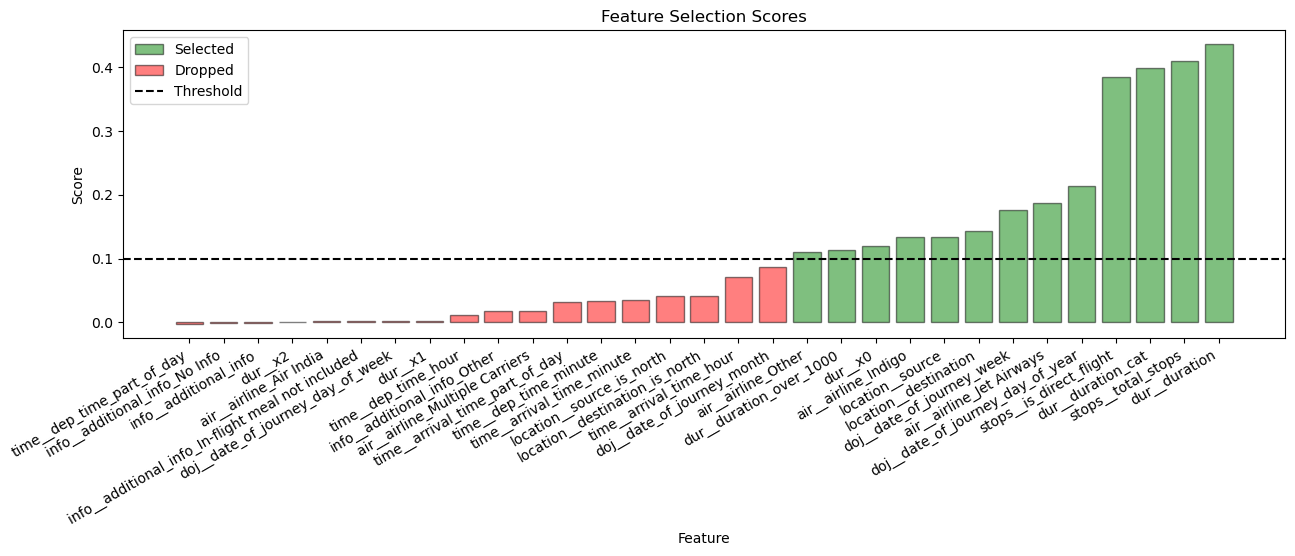

In [138]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
    params = dict(
        x=i,
        height=score,
        edgecolor="black",
        alpha=0.5
    )
    
    if score < THRESHOLD:
        bar = ax.bar(
            color="red",
            **params
        )
        if not dropped_bar:
            dropped_bar = bar[0]
    else:
        bar = ax.bar(
            color="green",
            **params
        )
        if not selected_bar:
            selected_bar = bar[0]

thresh_line = ax.axhline(
    y=0.1,
    color="black",
    linestyle="--"
)

ax.set_xticks(
    ticks=range(len(sorted_feat_imp)),
    labels=list(sorted_feat_imp.keys()),
    rotation=30,
    ha="right"
)

ax.set(
    xlabel="Feature",
    ylabel="Score",
    title="Feature Selection Scores"
)

ax.legend(
    handles=[selected_bar, dropped_bar, thresh_line],
    labels=["Selected", "Dropped", "Threshold"],
    loc="upper left"
)

plt.show()